# Các thư viện

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Đọc dữ liệu

In [2]:
weather_df = pd.read_csv('data/cleaned/daily_weather_data.csv', encoding='utf-8')
weather_df['date']= pd.to_datetime(weather_df['date'], format='%Y-%m-%d')
weather_df.head(5)

,date,country,city,Latitude,Longitude,tavg,tmin,tmax,wdir,wspd,pres,continent
0,2018-07-21,Abkhazia,Sukhumi,43.001525,41.023415,23.4,20.9,25.5,329.0,9.3,1009.6,Asia
1,2018-07-22,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.0,25.7,337.0,9.4,1010.0,Asia
2,2018-07-23,Abkhazia,Sukhumi,43.001525,41.023415,23.5,21.1,25.5,41.0,8.2,1007.7,Asia
3,2018-07-24,Abkhazia,Sukhumi,43.001525,41.023415,24.3,20.8,27.1,10.0,9.3,1004.4,Asia
4,2018-07-25,Abkhazia,Sukhumi,43.001525,41.023415,26.5,22.7,30.0,9.0,9.7,1002.0,Asia


# Câu hỏi 1: 

Thời gian giữa ngày 24/12 (Christmas Eve) và ngày 1/1 (Năm mới) là dịp nghỉ lễ lớn nhất trong năm ở phương Tây. Nơi đây cũng là nơi mà ta có thể đón Giáng Sinh có tuyết (White Christmas). Nhiệt độ ngoài trời thích hợp để có tuyết là dưới 2&deg;C, đồng thời cũng không quá lạnh cho lúc vui chơi.

Bạn K muốn đi du lịch _Châu Âu_ vào _tháng 12_ năm nay để ngắm tuyết, nhưng vì chưa biết chọn _thành phố_ nào cũng như không biết _nhiệt độ_ thời tiết như thế nào. Thế là bạn quyết định dựa vào nhiệt độ trung bình của năm gần nhất là 2021, đưa ra một danh sách để có thể quyết định dễ hơn.

# Từ ngày 24/12/2021 đến 1/1/2022, liệt kê 10 thành phố tại Châu Âu có nhiệt độ trung bình cao nhất và dưới 2&deg;C 

In [3]:
start_date = "2021-12-24"
end_date = "2022-1-1"

In [4]:
eu_cities = weather_df[(weather_df["date"].between(start_date, end_date)) &
                        (weather_df['continent'] == 'Europe')]

eu_cities = eu_cities[['city','tavg']]

In [5]:
eu_cities

,city,tavg
2980,Mariehamn,-5.1
2981,Mariehamn,-3.4
2982,Mariehamn,-4.9
2983,Mariehamn,-10.0
2984,Mariehamn,-0.3
...,...,...
310301,Vatican City,11.3
310302,Vatican City,12.0
310303,Vatican City,9.6
310304,Vatican City,9.7


In [6]:
warm_cities = eu_cities.groupby('city').mean()

### Trực quan 10 thành phố ấm áp nhất (dưới 2&deg;C)

#### Lấy ra những thành phố dưới 2&deg;C

In [7]:
warm_cities = warm_cities[warm_cities["tavg"] < 2]

In [8]:
warm_cities

,tavg
city,
Berlin,1.866667
Chisinau,-1.000000
Copenhagen,1.622222
Helsinki,-7.100000
Kiev,-3.188889
Longyearbyen,-17.177778
Mariehamn,-2.300000
Minsk,-4.855556
Moscow,-8.000000


#### Sắp xếp giảm dần và lấy ra 10 thành phố

In [9]:
warm_cities_visual = warm_cities.sort_values('tavg', ascending=False).head(10)

In [10]:
warm_cities_visual

,tavg
city,
Berlin,1.866667
Copenhagen,1.622222
Reykjavík,-0.944444
Chisinau,-1.000000
Warsaw,-1.177778
Tiraspol,-2.133333
Mariehamn,-2.300000
Stockholm,-2.677778
Kiev,-3.188889


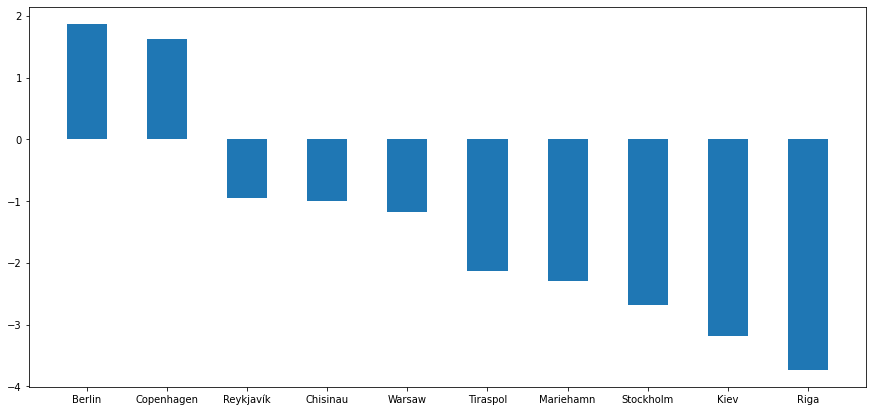

In [11]:
plt.figure(figsize=(15,7)) 
plt.bar(warm_cities_visual.index, warm_cities_visual['tavg'], width = 0.5)
plt.show()

Trong danh sách trên, ta có thể chọn được thành phố không quá lạnh nhưng vẫn được thấy tuyết rơi.
2 thành phố được khá nối tiếng mà ta có thể chọn được như _Berlin_ và _Copenhagen_

# Câu hỏi 2:

## Nhiệt độ trung bình mỗi tháng của Hà Nội thay đổi như thế nào?
- Tháng nào là tháng có nhiệt độ cao nhất/thấp nhất hàng năm?
- Liệu có thể dự đoán nhiệt độ tháng 11, 12 năm 2022 và tháng 1 năm 2023 khi chỉ dựa vào mỗi thông tin về các năm trước? (Ta cần xem xét xem nhiệt độ hằng năm vào các tháng trên có gần bằng nhau hay không? Từ đó suy ra thông tin năm 2022, 2023).

Lợi ích của trả lời câu hỏi: Nắm rõ sự thay đổi nhiệt độ tại đây giúp ta nhận biết nhiệt độ có hiện tượng gì bất thường hay không. Những người sắp đến đây cần biết trời nóng lạnh lúc nào.

### Kiểm tra Vietnam có bao nhiêu thành phố được thu thập?

In [12]:
weather_df[weather_df['country']=='Vietnam']['city'].value_counts()

Hanoi    1745
Name: city, dtype: int64

Chỉ có một thành phố là Hà Nội

### Để dễ nhìn, ta chỉ cần lấy 2 cột là __date__ và __tavg__ cho __Hanoi_df__

In [13]:
Hanoi_df = weather_df[weather_df['country']=='Vietnam'][['date', 'tavg']]
Hanoi_df

,date,tavg
312325,2018-01-01,17.3
312326,2018-01-02,17.1
312327,2018-01-03,19.3
312328,2018-01-04,19.4
312329,2018-01-05,20.1
...,...,...
314065,2022-10-07,25.8
314066,2022-10-08,26.4
314067,2022-10-09,24.8
314068,2022-10-10,23.9


### Thêm cột __month__ và __year__

In [14]:
Hanoi_df['month'] = pd.DatetimeIndex(Hanoi_df['date']).month
Hanoi_df['year'] = pd.DatetimeIndex(Hanoi_df['date']).year

In [15]:
Hanoi_df.set_index('date')

,tavg,month,year
date,,,
2018-01-01,17.3,1,2018
2018-01-02,17.1,1,2018
2018-01-03,19.3,1,2018
2018-01-04,19.4,1,2018
2018-01-05,20.1,1,2018
...,...,...,...
2022-10-07,25.8,10,2022
2022-10-08,26.4,10,2022
2022-10-09,24.8,10,2022


In [16]:
Hanoi_df.groupby(['year', 'month']).mean('tavg')

tavg
year month           
2018 1      17.358065
     2      17.007143
     3      22.025806
     4      23.696667
     5      28.529032
     6      29.480000
     7      29.100000
     8      28.225806
     9      27.993333
     10     24.951613
     11     23.033333
     12     18.841935
2019 1      17.141935
     2      21.557143
     3      21.800000
     4      26.443333
     5      27.109677
     6      30.156667
     7      30.100000
     8      28.858065
     9      28.086667
     10     25.396774
     11     22.353333
     12     18.387097
2020 1      18.754839
     2      18.931034
     3      22.187097
     4      21.553333
     5      28.535484
     6      30.783333
     7      30.525806
     8      28.406452
     9      28.210000
     10     23.954839
     11     22.860000
     12     17.551613
2021 1      15.929032
     2      20.035714
     3      21.961290
     4      24.830000
     5      28.822581
     6      30.486667
     7      29.951613
     8      29.419355
     9      27.943333
     10     23.680645
     11     21.276667
     12     17.987097
2022 1      17.574194
     2      14.503571
     3      22.038710
     4      23.743333
     5      25.690323
     6      29.820000
     7      29.354839
     8      28.729032
     9      27.943333
     10     25.900000

In [17]:
Hanoi_df = Hanoi_df.pivot_table(values='tavg', index='month',columns='year')
Hanoi_df

year,2018,2019,2020,2021,2022
month,,,,,
1,17.358065,17.141935,18.754839,15.929032,17.574194
2,17.007143,21.557143,18.931034,20.035714,14.503571
3,22.025806,21.800000,22.187097,21.961290,22.038710
4,23.696667,26.443333,21.553333,24.830000,23.743333
5,28.529032,27.109677,28.535484,28.822581,25.690323
6,29.480000,30.156667,30.783333,30.486667,29.820000
7,29.100000,30.100000,30.525806,29.951613,29.354839
8,28.225806,28.858065,28.406452,29.419355,28.729032
9,27.993333,28.086667,28.210000,27.943333,27.943333


<AxesSubplot:xlabel='Tháng', ylabel='Năm'>

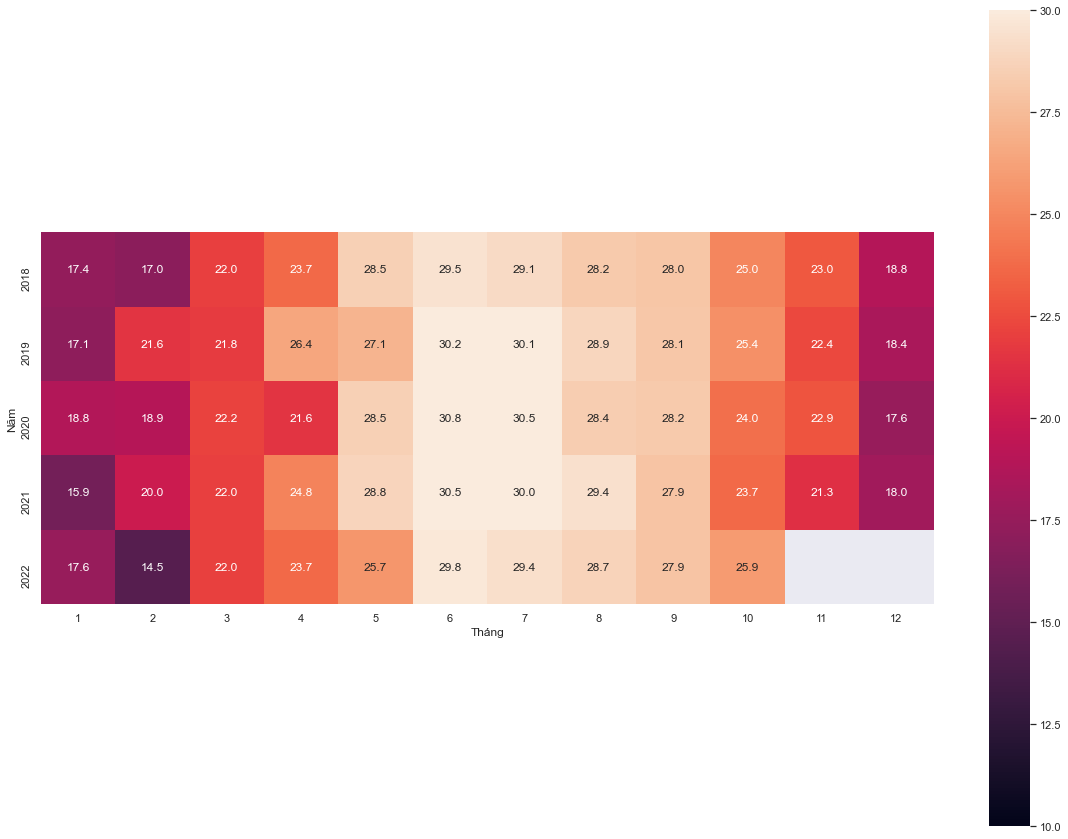

In [19]:
hn_heatmap = sns.heatmap(Hanoi_df.T, vmin=10, vmax=30, annot=True, fmt=".1f", square=True)
sns.set(rc = {'figure.figsize':(20,15)})
sns.color_palette("Reds", as_cmap=True)
hn_heatmap.set(xlabel="Tháng", ylabel="Năm")
hn_heatmap

Nhận xét:
- Tháng 6, tháng 7 là 2 tháng có nhiệt độ trung bình cao nhất.
- Tháng 1 hàng năm là tháng có nhiệt độ thấp nhất. 
- Nhiệt độ chênh lệch giữa các tháng kề nhau là không nhiều (khoảng dưới 3&deg;C)
- Ta có thể dự đoán nhiệt độ trung bình 
  - Tháng 11 năm nay là 22&deg;C
  - Tháng 12 là 18&deg;C
  - Tháng 1 năm sau sẽ có nhiệt độ trung bình xuống thấp nhất: 17&deg;C